## Importation des bibliothèques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Chargement et exploration des données

In [2]:
df = pd.read_csv("boston_housing_dataset/HousingData.csv", delimiter=",")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
df[df.duplicated()]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


Il n'y a pas de doublons dans les données

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Préparation des données

In [6]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
df[df.isna().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
14,0.63796,0.0,8.14,NaN,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2
35,0.06417,0.0,5.96,0.0,0.499,5.933,68.2,3.3603,5,279,19.2,396.90,NaN,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,4.64689,0.0,18.10,0.0,0.614,6.980,67.6,2.5329,24,666,20.2,374.68,NaN,29.8
479,14.33370,0.0,18.10,NaN,0.614,6.229,88.0,1.9512,24,666,20.2,383.32,13.11,21.4
482,5.73116,0.0,18.10,NaN,0.532,7.061,77.0,3.4106,24,666,20.2,395.28,7.01,25.0
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4


Nous avons au total 112 lignes comportant de données manquantes, il est préférable de ne pas supprimer bêtement toutes les lignes.

In [8]:
max(df.isna().sum(axis=1))

2

De plus, la ligne avec le plus de valeurs manquantes ne manque que de deux caractéristiques sur 13. Alors, ...

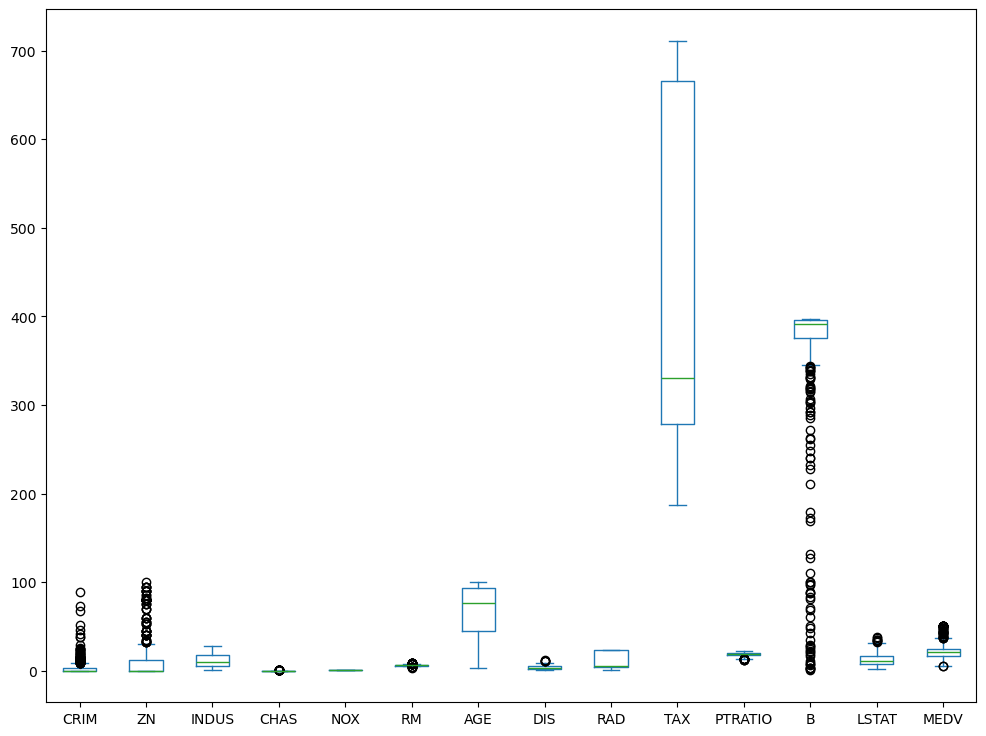

In [38]:
df.plot(kind='box', figsize=(12, 9))
plt.show()

Les variables comme AGE et surtout TAX ont une échelle supérieure à la majorité des autres variables. Il sera judicieux de  normaliser les données plus tard

In [10]:
from mlearn.preprocessing import Scaler

---

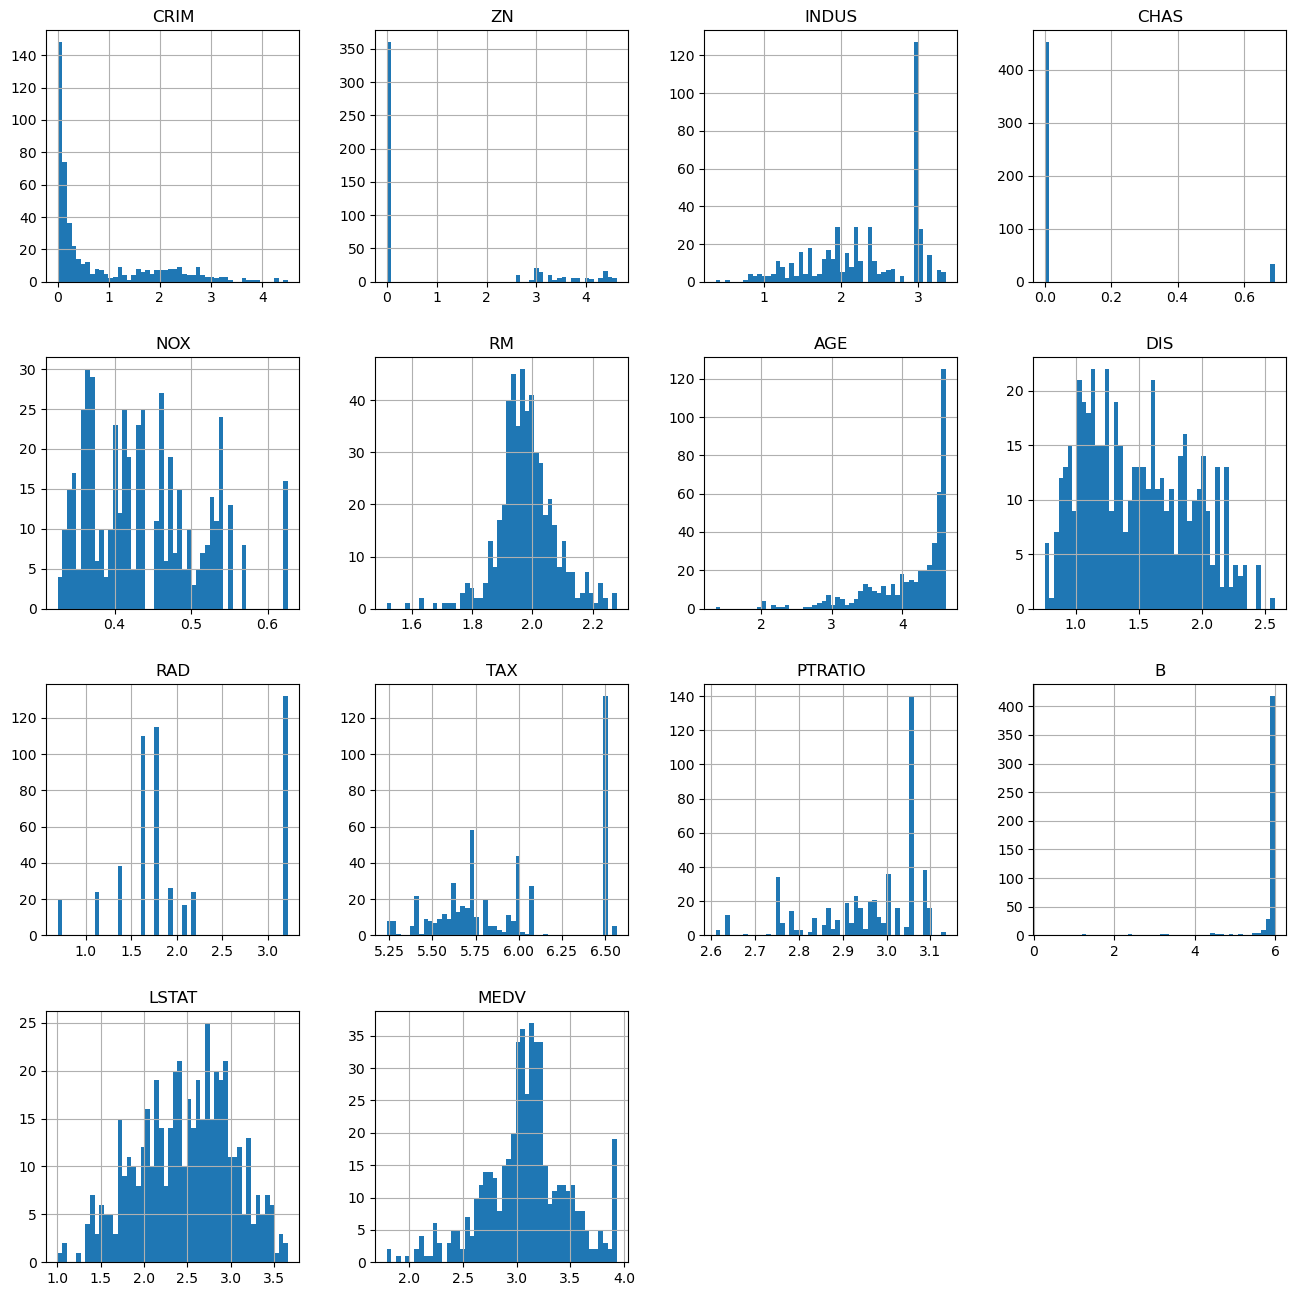

In [46]:
pd.DataFrame(np.log(df+1)).hist(figsize=(16, 16), bins=50)
plt.show()

df = pd.DataFrame(np.log(df+1))


In [47]:
df.corr().style.background_gradient(cmap='plasma')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.399029,0.636715,-0.017731,0.712033,-0.308641,0.474653,-0.653301,0.859450,0.822684,0.356830,-0.437703,0.555212,-0.601276
ZN,-0.399029,1.000000,-0.665076,-0.032195,-0.562970,0.340385,-0.516388,0.646572,-0.351132,-0.382437,-0.471612,0.164544,-0.489382,0.408410
INDUS,0.636715,-0.665076,1.000000,0.078152,0.751336,-0.428337,0.529348,-0.746865,0.599655,0.685384,0.425434,-0.274236,0.618382,-0.557472
CHAS,-0.017731,-0.032195,0.078152,1.000000,0.072632,0.099753,0.084997,-0.082340,0.017019,-0.035499,-0.106070,0.054841,-0.062730,0.166479
NOX,0.712033,-0.562970,0.751336,0.072632,1.000000,-0.315675,0.660709,-0.837314,0.613200,0.665903,0.179792,-0.297013,0.584252,-0.512006
RM,-0.308641,0.340385,-0.428337,0.099753,-0.315675,1.000000,-0.226899,0.264089,-0.212810,-0.305601,-0.342360,0.080046,-0.650209,0.619280
AGE,0.474653,-0.516388,0.529348,0.084997,0.660709,-0.226899,1.000000,-0.697444,0.394027,0.420469,0.217061,-0.186134,0.569215,-0.402514
DIS,-0.653301,0.646572,-0.746865,-0.082340,-0.837314,0.264089,-0.697444,1.000000,-0.540368,-0.585267,-0.218680,0.253841,-0.521845,0.390719
RAD,0.859450,-0.351132,0.599655,0.017019,0.613200,-0.212810,0.394027,-0.540368,1.000000,0.839281,0.416438,-0.379257,0.445977,-0.444867
TAX,0.822684,-0.382437,0.685384,-0.035499,0.665903,-0.305601,0.420469,-0.585267,0.839281,1.000000,0.413426,-0.368037,0.513578,-0.555187


### Imputation des valeurs manquantes

In [48]:
from sklearn.impute import SimpleImputer, KNNImputer

In [49]:
df_si = df.copy(deep=True)
df_si is df

False

In [50]:
cols_med = ['CRIM', 'ZN', 'CHAS']
cols_moy = ['INDUS', 'AGE', 'LSTAT']

simple_imputer1 = SimpleImputer(strategy='median')
df_si[cols_med] = simple_imputer1.fit_transform(df_si[cols_med])

simple_imputer2 = SimpleImputer(strategy='mean')
df_si[cols_moy] = simple_imputer2.fit_transform(df_si[cols_moy])

In [51]:
df_si.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [52]:
df_si.corr().style.background_gradient(cmap='plasma')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.379562,0.611601,-0.023135,0.698029,-0.310041,0.459462,-0.635335,0.824895,0.792234,0.352235,-0.425136,0.533674,-0.590291
ZN,-0.379562,1.000000,-0.628834,-0.028441,-0.545084,0.330156,-0.490116,0.624092,-0.336956,-0.373155,-0.448077,0.162119,-0.470223,0.396385
INDUS,0.611601,-0.628834,1.000000,0.071185,0.728901,-0.416952,0.511503,-0.732898,0.589681,0.670459,0.419049,-0.270309,0.592741,-0.553672
CHAS,-0.023135,-0.028441,0.071185,1.000000,0.068510,0.101397,0.079335,-0.080404,0.012018,-0.039036,-0.104465,0.053664,-0.064257,0.167600
NOX,0.698029,-0.545084,0.728901,0.068510,1.000000,-0.315675,0.643115,-0.837314,0.613200,0.665903,0.179792,-0.297013,0.573727,-0.512006
RM,-0.310041,0.330156,-0.416952,0.101397,-0.315675,1.000000,-0.222045,0.264089,-0.212810,-0.305601,-0.342360,0.080046,-0.639163,0.619280
AGE,0.459462,-0.490116,0.511503,0.079335,0.643115,-0.222045,1.000000,-0.681030,0.384793,0.412949,0.212054,-0.177184,0.536453,-0.391707
DIS,-0.635335,0.624092,-0.732898,-0.080404,-0.837314,0.264089,-0.681030,1.000000,-0.540368,-0.585267,-0.218680,0.253841,-0.511370,0.390719
RAD,0.824895,-0.336956,0.589681,0.012018,0.613200,-0.212810,0.384793,-0.540368,1.000000,0.839281,0.416438,-0.379257,0.433443,-0.444867
TAX,0.792234,-0.373155,0.670459,-0.039036,0.665903,-0.305601,0.412949,-0.585267,0.839281,1.000000,0.413426,-0.368037,0.502775,-0.555187


In [53]:
df_knn = df.copy(deep=True)

knn_imputer = KNNImputer(n_neighbors=5)
df_knn = knn_imputer.fit_transform(df_knn)
df_knn = pd.DataFrame(df_knn, columns=df.columns)

In [54]:
df_knn.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [55]:
df_knn.corr().style.background_gradient(cmap='plasma')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.410866,0.644605,-0.019332,0.713607,-0.303866,0.478905,-0.658425,0.861898,0.825923,0.373148,-0.445160,0.559531,-0.594514
ZN,-0.410866,1.000000,-0.672930,-0.035741,-0.565766,0.333299,-0.529178,0.653814,-0.357251,-0.381879,-0.455918,0.168264,-0.483863,0.399569
INDUS,0.644605,-0.672930,1.000000,0.069874,0.752955,-0.429072,0.547266,-0.747305,0.592258,0.678244,0.416650,-0.272764,0.625502,-0.559832
CHAS,-0.019332,-0.035741,0.069874,1.000000,0.070899,0.097302,0.092202,-0.077944,0.009419,-0.041489,-0.111700,0.055196,-0.070029,0.166848
NOX,0.713607,-0.565766,0.752955,0.070899,1.000000,-0.315675,0.665337,-0.837314,0.613200,0.665903,0.179792,-0.297013,0.589811,-0.512006
RM,-0.303866,0.333299,-0.429072,0.097302,-0.315675,1.000000,-0.221982,0.264089,-0.212810,-0.305601,-0.342360,0.080046,-0.652809,0.619280
AGE,0.478905,-0.529178,0.547266,0.092202,0.665337,-0.221982,1.000000,-0.705044,0.394250,0.422384,0.210751,-0.188416,0.559040,-0.395690
DIS,-0.658425,0.653814,-0.747305,-0.077944,-0.837314,0.264089,-0.705044,1.000000,-0.540368,-0.585267,-0.218680,0.253841,-0.525575,0.390719
RAD,0.861898,-0.357251,0.592258,0.009419,0.613200,-0.212810,0.394250,-0.540368,1.000000,0.839281,0.416438,-0.379257,0.450746,-0.444867
TAX,0.825923,-0.381879,0.678244,-0.041489,0.665903,-0.305601,0.422384,-0.585267,0.839281,1.000000,0.413426,-0.368037,0.520516,-0.555187


Ce dernier est beaucoup plus intéressant.

## Création de nouvelles features

In [56]:
# Filtrer les colonnes numériques continues à transformer
cols_to_transform = df_knn.drop(columns=['MEDV']).columns

# Exclure les colonnes binaires ou catégoriques discrètes si nécessaire
exclude_cols = ['CHAS']  # Colonnes discrètes
cols_to_transform = [col for col in cols_to_transform if col not in exclude_cols]

# Ajouter les puissances pour les colonnes sélectionnées
for col in cols_to_transform:
    for i in range(2, 3):  
        df_knn[col+f'_{i}'] = df_knn[col] ** i


### X et Y

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df_knn.drop(columns=['MEDV']), df_knn['MEDV']


### Normalisation

In [58]:
scaler = Scaler()
X = scaler.fit_transform(X)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modélisation

In [60]:
from mlearn.linear_model import LinearRegression as CustomLinearRegression
from mlearn.utils import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score

Early stopping after 100 iterations without significant change - Iteration n°1218


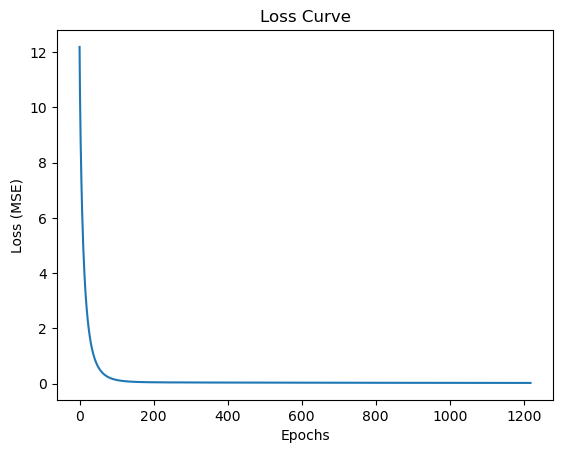

In [61]:
custom_model = CustomLinearRegression(n_iter=100000, learning_rate=0.05, early_stopping=True, n_iter_no_change=100)
custom_model.fit(X_train, y_train)
custom_model.plot()


In [62]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [63]:
dt_model = DecisionTreeRegressor(max_leaf_nodes=15, max_depth=12)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=12, max_leaf_nodes=15)

In [64]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=12, max_leaf_nodes=12, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, max_leaf_nodes=12, random_state=42)

## Evaluation des modèles

In [65]:
def evaluate(model):
    rmse = mean_squared_error(y_train, model.predict(X_train).squeeze(), squared=False)
    score = r2_score(y_train, model.predict(X_train).squeeze())
    print("RMSE on training set: ", rmse)
    print("Score on train set: ", score, end='\n\n')
    rmse = mean_squared_error(y_test, model.predict(X_test).squeeze(), squared=False)
    score = r2_score(y_test, model.predict(X_test).squeeze())
    print("RMSE on test set: ", rmse)
    print("Score on test set: ", score)

In [66]:
print("Custom Model RMSE")
evaluate(custom_model)

Custom Model RMSE
RMSE on training set:  0.21491510915888756
Score on train set:  0.6954260612961525

RMSE on test set:  0.25239913503384265
Score on test set:  0.5406888297136538


In [67]:
print("Sklearn Model RMSE")
evaluate(model)

Sklearn Model RMSE
RMSE on training set:  0.15516538541286512
Score on train set:  0.8412372799078033

RMSE on test set:  0.16256868155513157
Score on test set:  0.8094517124717566


In [68]:
print("Sklearn Decision Tree Model RMSE")
evaluate(dt_model)

Sklearn Decision Tree Model RMSE
RMSE on training set:  0.13599704638557533
Score on train set:  0.8780398935262281

RMSE on test set:  0.1883020676115387
Score on test set:  0.744352552808806


In [401]:
print("Sklearn Model RMSE")
evaluate(rf_model)

Sklearn Model RMSE
RMSE on training set:  2.8901026030922723
Score on test set:  0.9038521263370605

RMSE on test set:  3.133398046699873
Score on test set:  0.8661165032547417


In [402]:
selected_model = dt_model
selected_model.fit(X, y)

DecisionTreeRegressor(max_depth=12, max_leaf_nodes=15)

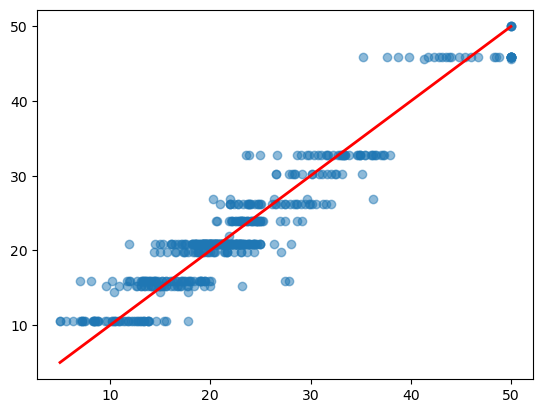

In [404]:
y_pred = selected_model.predict(X)
plt.scatter(y, y_pred, alpha=0.5)

x_max = max(np.max(y), np.max(y_pred))
x_min = min(np.min(y), np.min(y_pred))

plt.plot([x_min, x_max], [x_min, x_max], c='r', lw=2)

plt.show()

## Explication du modèle

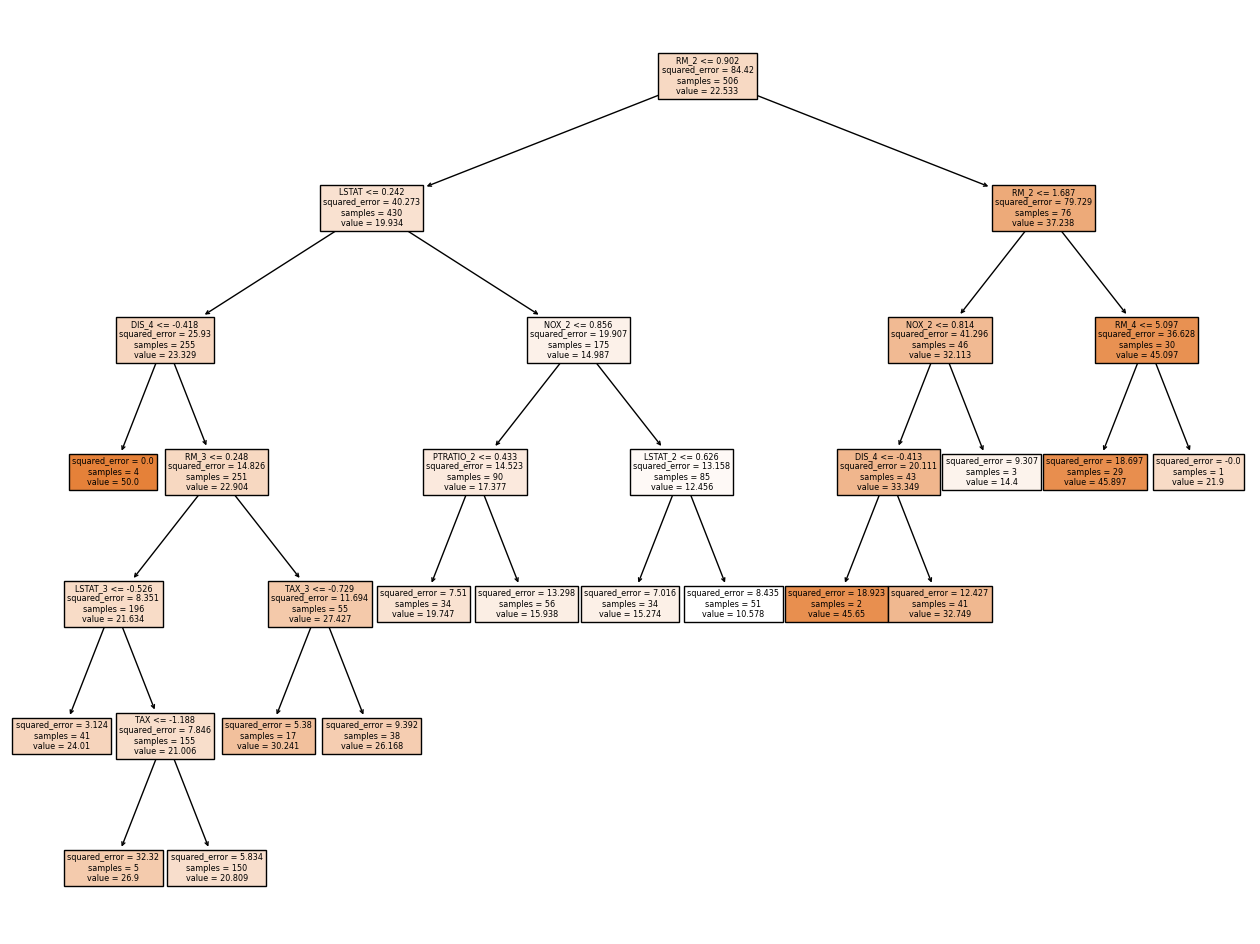

In [403]:
plt.figure(figsize=(16, 12))  # Taille de l'image
plot_tree(dt_model, feature_names=X.columns, filled=True)
plt.show()

## Allez hop, on enregistre les trucs essentiels

In [23]:
scaler.to_json("boston_scaler.json") # le normaliseur
custom_model.to_json("boston_custom_model.json") # notre modèle fait maison

In [24]:
import joblib

joblib.dump(model, 'boston_model.joblib')
print("Modèle enregistré dans 'model.joblib'.")

Modèle enregistré dans 'model.joblib'.


In [25]:
# loaded_model = joblib.load('model.joblib')
# print("Modèle chargé.")

In [ ]:
r2_score()